In [1]:
# import all necessary packages and functions.
# babs_datacheck and babs_visualizations are py datafiles
# so must be in the folder from which you launch this .ipynb
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
%matplotlib inline

In [11]:
# HOW CSV.READER WORKS?

file_in  = '201402_trip_data.csv'

#we need to open the file, before we read or write
test_list = []
with open(file_in, 'r') as f_in:
    # set up csv reader and writer objects
    in_reader = csv.reader(f_in)
    # in_reader is a list of lists
    for x in in_reader:
        test_list.append(x)
          
test_list[0:2]

[['Trip ID',
  'Duration',
  'Start Date',
  'Start Station',
  'Start Terminal',
  'End Date',
  'End Station',
  'End Terminal',
  'Bike #',
  'Subscription Type',
  'Zip Code'],
 ['4576',
  '63',
  '8/29/2013 14:13',
  'South Van Ness at Market',
  '66',
  '8/29/2013 14:14',
  'South Van Ness at Market',
  '66',
  '520',
  'Subscriber',
  '94127']]

['Trip ID', 'Duration', 'Start Date', 'Start Station', 'Start Terminal', 'End Date', 'End Station', 'End Terminal', 'Bike #', 'Subscription Type', 'Zip Code']....`HEADER LIST`
['4576', '63', '8/29/2013 14:13', 'South Van Ness at Market', '66', '8/29/2013 14:14', 'South Van Ness at Market', '66', '520', 'Subscriber', '94127']....and so on. This is technically the first row.

In [12]:
# HOW CSV.DICTREADER WORKS?

file_in  = '201402_trip_data.csv'
#we need to open the file, before we read or write
test_list1=[]
with open(file_in, 'r') as f_in:
    # set up csv reader and writer objects
    in_reader = csv.DictReader(f_in)
    for x in in_reader:
        test_list1.append(x)
test_list1[0:2]    

[{'Bike #': '520',
  'Duration': '63',
  'End Date': '8/29/2013 14:14',
  'End Station': 'South Van Ness at Market',
  'End Terminal': '66',
  'Start Date': '8/29/2013 14:13',
  'Start Station': 'South Van Ness at Market',
  'Start Terminal': '66',
  'Subscription Type': 'Subscriber',
  'Trip ID': '4576',
  'Zip Code': '94127'},
 {'Bike #': '661',
  'Duration': '70',
  'End Date': '8/29/2013 14:43',
  'End Station': 'San Jose City Hall',
  'End Terminal': '10',
  'Start Date': '8/29/2013 14:42',
  'Start Station': 'San Jose City Hall',
  'Start Terminal': '10',
  'Subscription Type': 'Subscriber',
  'Trip ID': '4607',
  'Zip Code': '95138'}]

{'Subscription Type': 'Subscriber', 'End Date': '8/29/2013 14:14', 'Bike #': '520', 'Zip Code': '94127', 'Start Terminal': '66', 'End Station': 'South Van Ness at Market', 'Start Station': 'South Van Ness at Market', 'Duration': '63', 'Start Date': '8/29/2013 14:13', 'Trip ID': '4576', 'End Terminal': '66'}
{'Subscription Type': 'Subscriber', 'End Date': '8/29/2013 14:43', 'Bike #': '661', 'Zip Code': '95138', 'Start Terminal': '10', 'End Station': 'San Jose City Hall', 'Start Station': 'San Jose City Hall', 'Duration': '70', 'Start Date': '8/29/2013 14:42', 'Trip ID': '4607', 'End Terminal': '10'}

- We just saw that `csv.reader` reads each row of the data-file as a lists,(the first row that is header is also read as a list). But `csv.DictReader` reads each row of the data-file as a dictionary and retain the first row as header.

In [12]:
# How to read (a bigger file) and write (Extract and write a thinner) csv files:
# We chose the name of the o/p csv files
# file locations
file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

#we need to open the file, before we read or write
with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # set up csv reader and writer objects
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # So in_reader is collection of lists, where a list is a row of the data-file
    # The method next() is used when a file is used as an iterator, typically
    # in a loop, next() keeps reading the next line that is a row until the While
    # condition is satisfied or we reach end of file, EOF
    
    while True:
        datarow = next(in_reader)
        # datarow is a list
        # third item in the column is "Start Date" and which is a string, we 
        # want first 0th to 8th elements of that string and that is date
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)        


Now we will have a look at the '201309_trip_data.csv' that we jusr created.

In [5]:
sample_data = pd.read_csv('201309_trip_data.csv')

display(sample_data.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In this exploration, we will look for the factors that are likely to effect the trips made by users, denoted by Trip ID. 

Let's focus down on a few selected columns: the trip duration, start time, start terminal, end terminal, and subscription type. For the ease of analysing the data; 

1. lets divide the Start Date into year, month, and hour components. 
2. Add a column for the day of the week and 
3. since, start/end terminal no is not of much help, lets make it to denote the start/end city.

As we are interested in knowing which terminal belongs to which city, we must look at the station data file that has all the information pertaining to the station data.

In [13]:
# Display the first few rows of the station data file.

station_info = pd.read_csv('201402_station_data.csv')
display(station_info.head())

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


So we can see here, the station terminal (in trip data) is depicted as station_id. 

> We will create a function `create_station_mapping()` that will take a list that contains the CSVs of station data and return a dictionary that has `key` as terminal or station id and `value` as the city in which the terminal is located.

In [15]:
# This function will be called by another function later on to create the mapping.
def create_station_mapping(station_data):
    """
    Create a mapping from station IDs to cities, returning the
    result as a dictionary.
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # set up csv reader object - note that we are using DictReader, which
            # takes the first row of the file as a header and returns a collection of 
            # dictionaries one for each row
            
            weather_reader = csv.DictReader(f_in)
            # weather_reader is a collection of dictionary and row is a dictionary
            # we will populate the empty dictionary `station_map` by fetching keys
            # (value for station_id) and values (value for landmark) from 
            # the weather_reader dictionary

            for row in weather_reader:
                station_map[row['station_id']] = row['landmark']
    return station_map

To analyse the data and to know hoe the ridership varies, we need certain variables/factors, 
> we shall consider: duration, start_date, start_year, start_month, start_hour, weekday, start_city, end_city, subscription_type. 

So these variables are spread over different types of files. So we shall create a function that reads data from lists of files and write an output file for us to analyse. In that function we shall also divide the start date column into many of its constituents. 

In [16]:
def summarise_data(trip_in, station_data, trip_out):
    """
    trip_in is a list that contains CSVs pertaining to trip info
    station_data is a list that contains CSVs pertaiing to station info
    trip_out is an output file, in which we shall include all columns/variables we want to analyse
    """
    # generate dictionary of station - city mapping.
    # Use of station_data ends here
    station_map = create_station_mapping(station_data)
    
    # set up csv writer object
    with open(trip_out, 'w') as f_out:
        # columns/variables you want in your output file        
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type'] 
        # write all the requisite data as a collection of dictionaries
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        # make first row the header/column name
        trip_writer.writeheader()
        
        for data_file in trip_in:
            # data_file is a csv file in the collection of files trip_in
            with open(data_file, 'r') as f_in:
            #file needs to be opened to be read/written
                
                trip_reader = csv.DictReader(f_in)
                # read the file and return a collection of dictionary

                # row is a dictionary
                for row in trip_reader:
                    # create a dictionary in which keys will be columns
                    # and values will be the values of resp keys
                    new_point = {}
                    
                    ### to convert durations from seconds to minutes. 
                    new_point['duration'] = float(row['Duration'])/60
                    
                    # first read the date column using the strptime function in datetime
                    # module, also provide the date string format of date values
                    # next, parse the timestamp strings to fetch various constituents
                    
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.strftime('%Y-%m-%d') 
                    new_point['start_year']  = trip_date.strftime('%Y') #trip_date.year
                    new_point['start_month'] = trip_date.strftime('%b') #trip_date.month
                    new_point['start_hour']  = trip_date.strftime('%H') #trip_date.hour
                    new_point['weekday']     = trip_date.strftime('%a') #trip_date.weekday()
                    
                    # row['Start Terminal'] will give the value of the key 'Start Terminal'
                    # in dictionary 'row' and it will further serve as a key for station_map dict
                    new_point['start_city'] = station_map[row['Start Terminal']]
                    new_point['end_city'] = station_map[row['End Terminal']]
                    
                    # we have 'Subscription Type' and 'Subscriber Type' denoting the same variable
                    # in diff files in the trip_out list..we shall name it 'Subscription Type'
                    
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # last line is the return though name trip_out is not specified
                    trip_writer.writerow(new_point)

In [10]:
# Process the data by running the function we wrote above.
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

# Load in the data file and print out the first few rows
sample_data = pd.read_csv(trip_out)
display(sample_data.head())

# Verify the dataframe by counting data points matching each of the time features.
question_3(sample_data)

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,Aug,14,Thu,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,Aug,14,Thu,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,Aug,10,Thu,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,Aug,11,Thu,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,Aug,12,Thu,San Francisco,San Francisco,Subscriber


All counts are as expected!


## Exploratory Data Analysis

Now that you have some data saved to a file, let's look at some initial trends in the data. We have written some functions in the `babs_visualizations.py` script to help summarize and visualize the data; this has been imported as the functions `usage_stats()` and `usage_plot()`. 

In this section we'll walk through some of the things you can do with the functions, and you'll use the functions for yourself in the last part of the project. First, run the following cell to load the data, then use the `usage_stats()` function to see the total number of trips made in the first month of operations, along with some statistics regarding how long trips took.

In [11]:
trip_data = pd.read_csv('201309_trip_summary.csv')

usage_stats(trip_data)

There are 27345 data points in the dataset.
The average duration of trips is 27.60 minutes.
The median trip duration is 10.72 minutes.
25% of trips are shorter than 6.82 minutes.
25% of trips are longer than 17.28 minutes.


array([  6.81666667,  10.71666667,  17.28333333])

You should see that there are over 27,000 trips in the first month, and that the average trip duration is larger than the median trip duration (the point where 50% of trips are shorter, and 50% are longer). In fact, the mean is larger than the 75% shortest durations. This will be interesting to look at later on.

Let's start looking at how those trips are divided by subscription type. One easy way to build an intuition about the data is to plot it. We'll use the `usage_plot()` function for this. The second argument of the function allows us to count up the trips across a selected variable, displaying the information in a plot. The expression below will show how many customer and how many subscriber trips were made. Try it out!

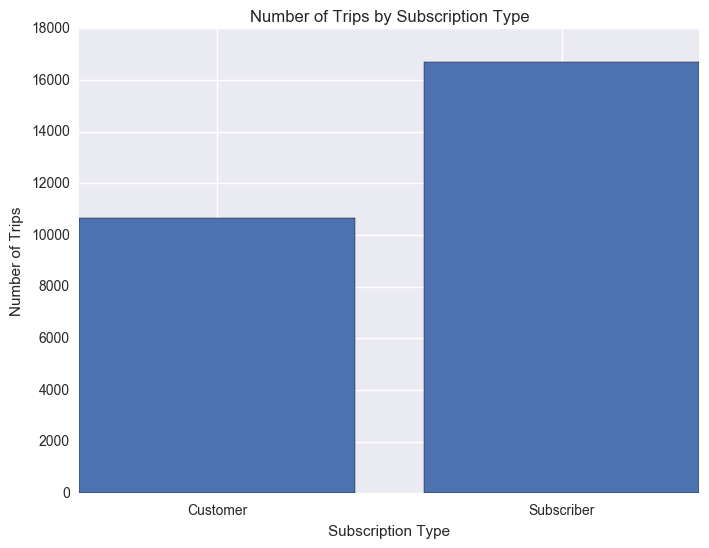

In [12]:
usage_plot(trip_data, 'subscription_type')

Seems like there's about 50% more trips made by subscribers in the first month than customers. Let's try a different variable now. What does the distribution of trip durations look like?

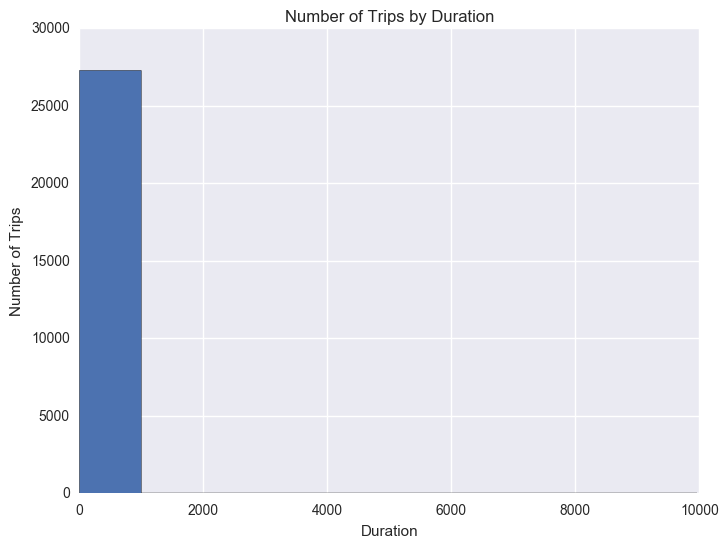

In [13]:
usage_plot(trip_data, 'duration')

Looks pretty strange, doesn't it? Take a look at the duration values on the x-axis. Most rides are expected to be 30 minutes or less, since there are overage charges for taking extra time in a single trip. The first bar spans durations up to about 1000 minutes, or over 16 hours. Based on the statistics we got out of `usage_stats()`, we should have expected some trips with very long durations that bring the average to be so much higher than the median: the plot shows this in a dramatic, but unhelpful way.

When exploring the data, you will often need to work with visualization function parameters in order to make the data easier to understand. Here's where the third argument of the `usage_plot()` function comes in. Filters can be set for data points as a list of conditions. Let's start by limiting things to trips of less than 60 minutes.

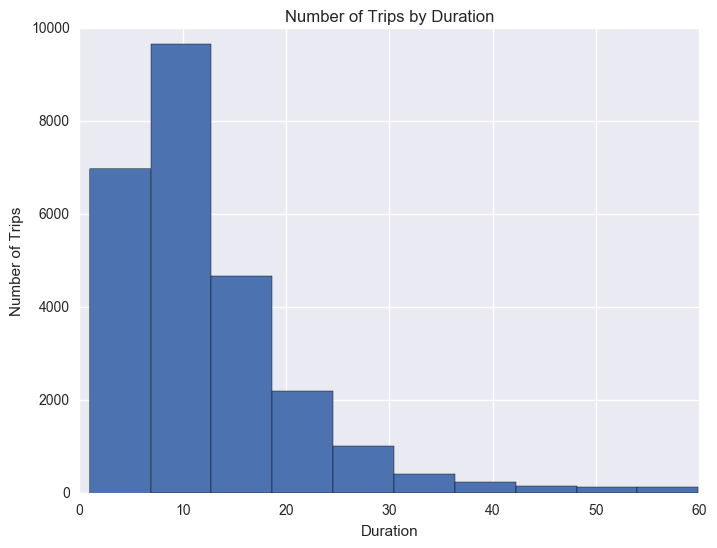

In [14]:
usage_plot(trip_data, 'duration', ['duration < 60'])

This is looking better! You can see that most trips are indeed less than 30 minutes in length, but there's more that you can do to improve the presentation. Since the minimum duration is not 0, the left hand bar is slighly above 0. We want to be able to tell where there is a clear boundary at 30 minutes, so it will look nicer if we have bin sizes and bin boundaries that correspond to some number of minutes. Fortunately, you can use the optional "boundary" and "bin_width" parameters to adjust the plot. By setting "boundary" to 0, one of the bin edges (in this case the left-most bin) will start at 0 rather than the minimum trip duration. And by setting "bin_width" to 5, each bar will count up data points in five-minute intervals.

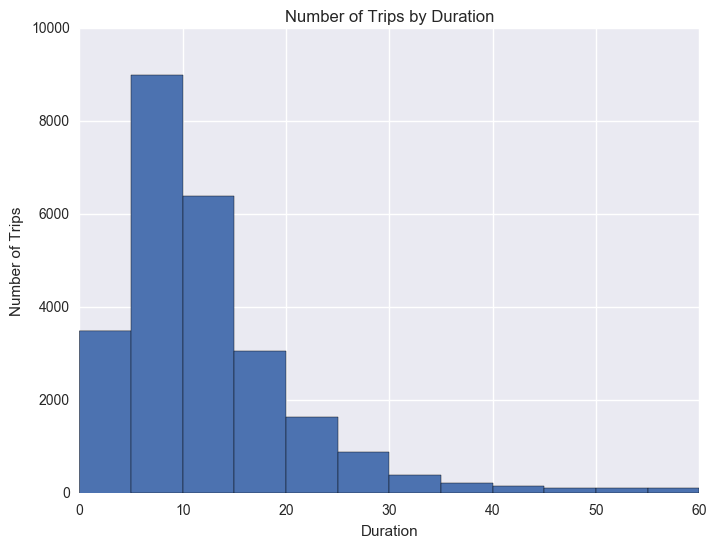

In [15]:
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

Which five-minute trip duration shows the most number of trips? Approximately how many trips were made in this range?

Clearly, the trip duration between 5-10 minutes, most number of trips occurred and the number of such trips is around 9000. 

Visual adjustments like this might be small, but they can go a long way in helping you understand the data and convey your findings to others.

## Performing Your Own Analysis

Now that you've done some exploration on a small sample of the dataset, it's time to go ahead and put together all of the data in a single file and see what trends you can find. The code below will use the same `summarise_data()` function as before to process data. After running the cell below, you'll have processed all the data into a single data file. Note that the function will not display any output while it runs, and this can take a while to complete since you have much more data than the sample you worked with above.

In [16]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# This function will take in the station data and trip data and
# write out a new data file to the name listed above in trip_out.
summarise_data(trip_in, station_data, trip_out)

Since the `summarise_data()` function has created a standalone file, the above cell will not need to be run a second time, even if you close the notebook and start a new session. You can just load in the dataset and then explore things from there.

In [17]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,Aug,14,Thu,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,Aug,14,Thu,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,Aug,10,Thu,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,Aug,11,Thu,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,Aug,12,Thu,San Francisco,San Francisco,Subscriber


#### Now lets explore the new dataset with `usage_stats()` and `usage_plot()`. Here's a refresher on how to use the `usage_plot()` function:
- first argument (required): loaded dataframe from which data will be analyzed.
- second argument (required): variable on which trip counts will be divided.
- third argument (optional): data filters limiting the data points that will be counted. Filters should be given as a list of conditions, each element should be a string in the following format: `'<field> <op> <value>'` using one of the following operations: >, <, >=, <=, ==, !=. Data points must satisfy all conditions to be counted or visualized. For example, `["duration < 15", "start_city == 'San Francisco'"]` retains only trips that originated in San Francisco and are less than 15 minutes long.

If data is being split on a numeric variable (thus creating a histogram), some additional parameters may be set by keyword.
- "n_bins" specifies the number of bars in the resultant plot (default is 10).
- "bin_width" specifies the width of each bar (default divides the range of the data by number of bins). "n_bins" and "bin_width" cannot be used simultaneously.
- "boundary" specifies where one of the bar edges will be placed; other bar edges will be placed around that value (this may result in an additional bar being plotted). This argument may be used alongside the "n_bins" and "bin_width" arguments.

You can also add some customization to the `usage_stats()` function as well. The second argument of the function can be used to set up filter conditions, just like how they are set up in `usage_plot()`.

In [26]:
usage_stats(trip_data, ['duration > 5', 'duration < 15'])

There are 432125 data points (64.50%) matching the filter criteria.
The average duration of trips is 9.07 minutes.
The median trip duration is 8.73 minutes.
25% of trips are shorter than 6.83 minutes.
25% of trips are longer than 11.05 minutes.


array([  6.83333333,   8.73333333,  11.05      ])

In [28]:
usage_stats(trip_data, ['subscription_type == Subscriber'])

There are 566746 data points (84.59%) matching the filter criteria.
The average duration of trips is 9.83 minutes.
The median trip duration is 7.93 minutes.
25% of trips are shorter than 5.38 minutes.
25% of trips are longer than 11.10 minutes.


array([  5.38333333,   7.93333333,  11.1       ])

In [29]:
usage_stats(trip_data, ['subscription_type == Customer'])

There are 103213 data points (15.41%) matching the filter criteria.
The average duration of trips is 65.86 minutes.
The median trip duration is 18.60 minutes.
25% of trips are shorter than 10.97 minutes.
25% of trips are longer than 38.82 minutes.


array([ 10.96666667,  18.6       ,  38.81666667])

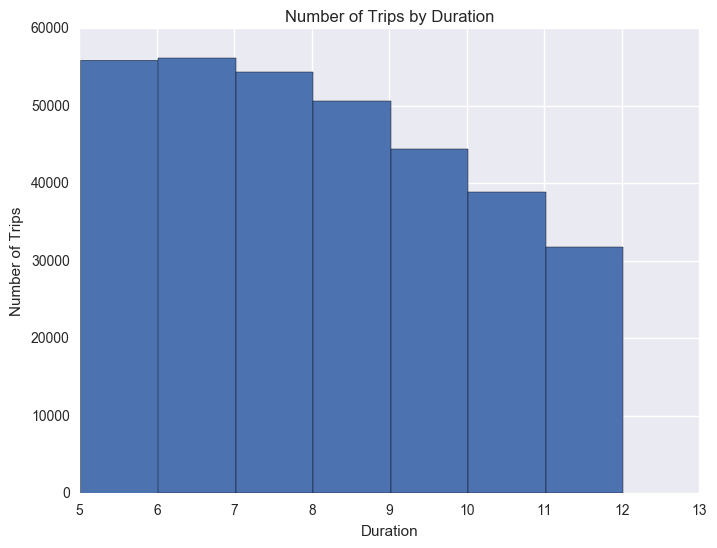

In [46]:
usage_plot(trip_data, 'duration', ['duration > 5', 'duration < 12', 'subscription_type == Subscriber'], bin_width = 1)

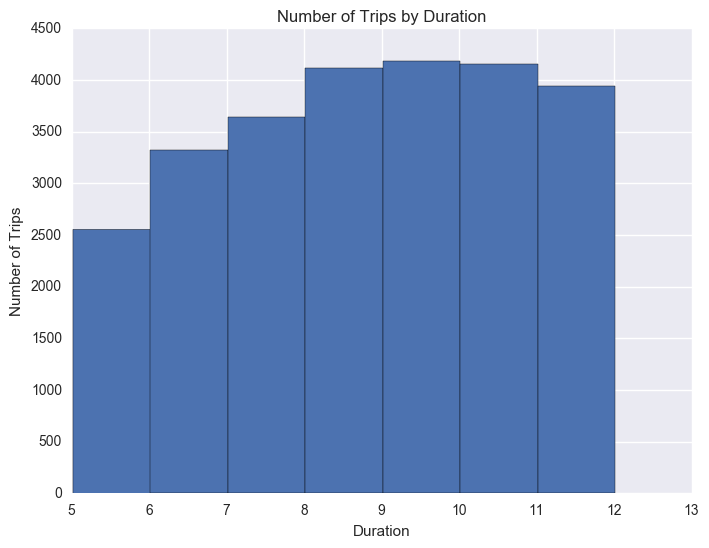

In [47]:
usage_plot(trip_data, 'duration', ['duration > 5', 'duration < 12', 'subscription_type == Customer'], bin_width = 1)

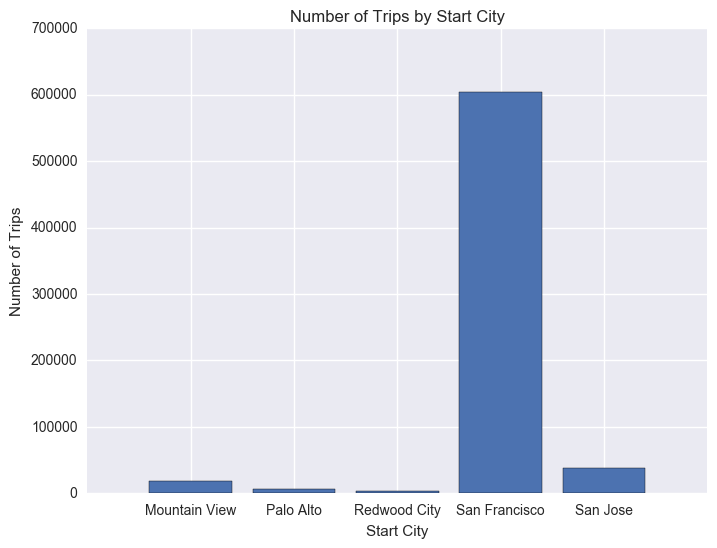

In [48]:
usage_plot(trip_data, 'start_city')

Explore some different variables using the functions above and take note of some trends you find. Feel free to create additional cells if you want to explore the dataset in other ways or multiple ways.

> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

One you're done with your explorations, copy the two visualizations you found most interesting into the cells below, then answer the following questions with a few sentences describing what you found and why you selected the figures. Make sure that you adjust the number of bins or the bin limits so that they effectively convey data findings. Feel free to supplement this with any additional numbers generated from `usage_stats()` or place multiple visualizations to support your observations.

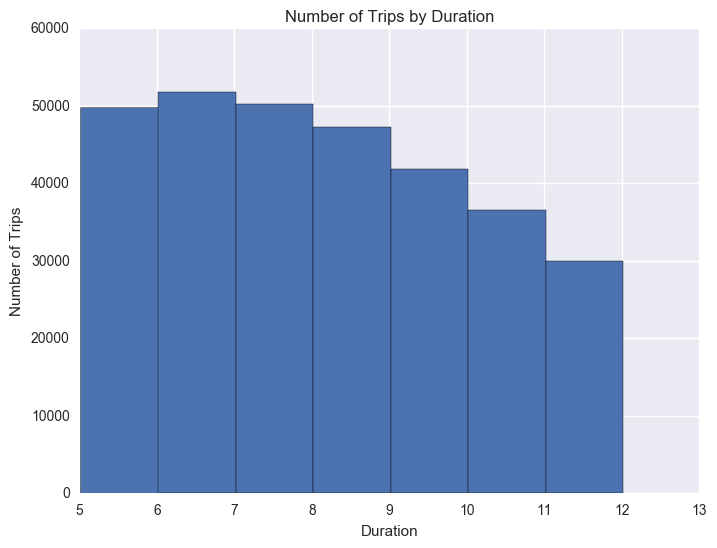

In [67]:
# Final Plot 1
usage_plot(trip_data, 'duration', ['duration > 5', 'duration < 12',"start_city == 'San Francisco'",
                                   'subscription_type == Subscriber'], bin_width = 1)

What is interesting about the above visualization? 

Since the city of San Francisco has the lions share of ridership, and a majority of the ridership lies between 5 and 12 minutes. I wanted to see how ridership varies with subscription type and in a micro-perspective, for Subscribers the data is rightward skewed.

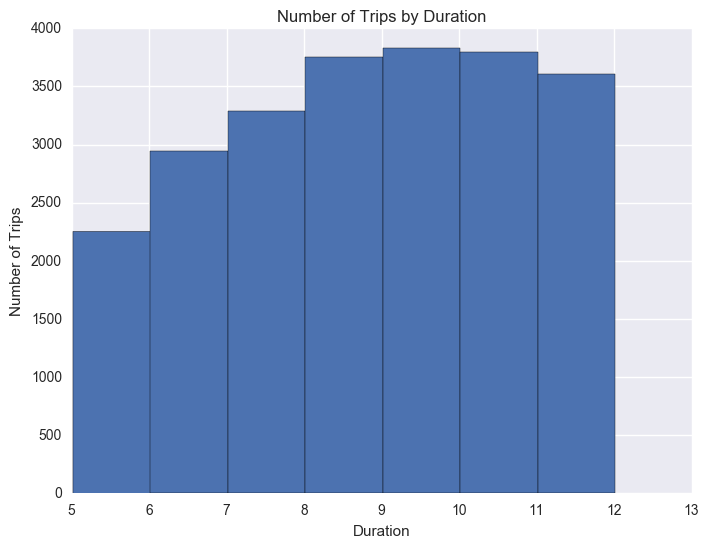

In [68]:
# Final Plot 2
usage_plot(trip_data, 'duration', ['duration > 5', 'duration < 12',"start_city == 'San Francisco'",
                                   'subscription_type == Customer'], bin_width = 1)

What is interesting about the above visualization? Why did you select it?

Since the city of San Francisco has the lions share of ridership, and a majority of the ridership lies between 5 and 12 minutes. I wanted to see how ridership varies with subscription type and in a micro-perspective, for Customers the data is leftward skewed, this suggests that irregular customers tend to use the bike for longer duration/distance.

## Conclusions

This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about our data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data. Instead of just looking at number of trips on the outcome axis, we could see what features affect things like trip duration. We also haven't looked at how the weather data ties into bike usage.
